# Import Packages

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Import Data


* The data was retrieved from the [BioLINCC](https://biolincc.nhlbi.nih.gov/teaching/) website
* Data was obtained from an ongoing cardiovascular study on residents of the town of Framingham, Massachusetts which was collected during three examination periods, approximately 6 years apart, from roughly 1956 to 1968
* Missing values in the dataset are indicated by a period (.)
* Disclaimer: This is teaching data that has been rendered anonymous through the application of certain statistical processes such as permutations and/or random visit selection. We cannot claim or imply that any inferences derived from the teaching datasets are valid estimates

## Data Dictionary

|Variable|Description|Variable Type|Levels (if applicable)/<br> Notes|
| --- | --- |---|---|
|RANDID | Unique identification number for each participant|NA||
|SEX | Participant sex|Categorical|1=Men <br> 2=Women|
|PERIOD|Examination Cycle|Categorical|1=Period 1 <br> 2=Period 2 <br> 3=Period 3|
|AGE|Age at exam (years)|Continuous|
|SYSBP|Systolic Blood Pressure (mean of last two of three <br> measurements) (mmHg)|Continuous|
|DIABP|Diastolic Blood Pressure (mean of last two of three <br> measurements) (mmHg)|Continuous|
|BPMEDS|Use of Anti-hypertensive medication at exam|Categorical|0=Not currently used <br> 1=Current Use|
|CURSMOKE|Current cigarette smoking at exam|Categorical|0=Not current smoker <br> 1=Current smoker|
|CIGPDAY|Number of cigarettes smoked each day|Continuous|0=Not current smoker <br> 1-90 cigarettes per day|
|TOTCHOL|Serum Total Cholesterol (mg/dL)|Continuous|
|HDLC|High Density Lipoprotein Cholesterol (mg/dL)|Continuous|Available for period 3 only|
|LDLC|Low Density Lipoprotein Cholesterol (mg/dL)|Continuous|Available for period 3 only|
|BMI|Body Mass Index, weight in kilograms/height <br> meters squared|Continuous|
|GLUCOSE|Casual serum glucose (mg/dL)|Continuous|
|DIABETES|Diabetic according to criteria of first exam <br> treated or first exam with casual glucose <br> of 200 mg/dL or more|Categorical|0=Not a diabetic <br> 1=Diabetic|
|HEARTRTE|Heart rate (Ventricular rate) in beats/min|Continuous|
|PREVHYP|Prevalent Hypertensive. Subject was defined as <br> hypertensive if treated or if second exam at <br>which mean systolic was >=140 mmHg or mean<br>  Diastolic >=90 mmHg|Categorical|0=Free of disease <br> 1=Prevalent disease|
|ANYCHD|Angina Pectoris, <br> Myocardial infarction (Hospitalized and silent or unrecognized), <br>Coronary Insufficiency (Unstable Angina), <br> or Fatal Coronary Heart Disease|Categorical|0=Event did not occur during follow up <br> 1=Event occurred during followup|
|STROKE|Atherothrombotic infarction, <br>Cerebral Embolism, <br>Intracerebral Hemorrhage, <br> or Subarachnoid Hemorrhage, <br> or Fatal Cerebrovascular Disease|Categorical|0=Event did not occur during follow up <br> 1=Event occurred during followup|
|DEATH|Death from any cause|Categorical|0=Event did not occur during follow up <br> 1=Event occurred during followup|

In [2]:
framingham = pd.read_csv('/Users/silviacatalina/Google Drive/BethelTech/GitHub/wozU-DataSci/DS0110-FinalProject/Framingham/Data/csv/frmgham2.csv', na_values=".")
pd.options.display.max_columns = None
framingham.head()

,RANDID,SEX,TOTCHOL,AGE,SYSBP,DIABP,CURSMOKE,CIGPDAY,BMI,DIABETES,BPMEDS,HEARTRTE,GLUCOSE,educ,PREVCHD,PREVAP,PREVMI,PREVSTRK,PREVHYP,TIME,PERIOD,HDLC,LDLC,DEATH,ANGINA,HOSPMI,MI_FCHD,ANYCHD,STROKE,CVD,HYPERTEN,TIMEAP,TIMEMI,TIMEMIFC,TIMECHD,TIMESTRK,TIMECVD,TIMEDTH,TIMEHYP
0,2448,1,195.0,39,106.0,70.0,0,0.0,26.97,0,0.0,80.0,77.0,4.0,0,0,0,0,0,0,1,NaN,NaN,0,0,1,1,1,0,1,0,8766,6438,6438,6438,8766,6438,8766,8766
1,2448,1,209.0,52,121.0,66.0,0,0.0,NaN,0,0.0,69.0,92.0,4.0,0,0,0,0,0,4628,3,31.0,178.0,0,0,1,1,1,0,1,0,8766,6438,6438,6438,8766,6438,8766,8766
2,6238,2,250.0,46,121.0,81.0,0,0.0,28.73,0,0.0,95.0,76.0,2.0,0,0,0,0,0,0,1,NaN,NaN,0,0,0,0,0,0,0,0,8766,8766,8766,8766,8766,8766,8766,8766
3,6238,2,260.0,52,105.0,69.5,0,0.0,29.43,0,0.0,80.0,86.0,2.0,0,0,0,0,0,2156,2,NaN,NaN,0,0,0,0,0,0,0,0,8766,8766,8766,8766,8766,8766,8766,8766
4,6238,2,237.0,58,108.0,66.0,0,0.0,28.50,0,0.0,80.0,71.0,2.0,0,0,0,0,0,4344,3,54.0,141.0,0,0,0,0,0,0,0,0,8766,8766,8766,8766,8766,8766,8766,8766


In [3]:
framingham.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11627 entries, 0 to 11626
Data columns (total 39 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   RANDID    11627 non-null  int64  
 1   SEX       11627 non-null  int64  
 2   TOTCHOL   11218 non-null  float64
 3   AGE       11627 non-null  int64  
 4   SYSBP     11627 non-null  float64
 5   DIABP     11627 non-null  float64
 6   CURSMOKE  11627 non-null  int64  
 7   CIGPDAY   11548 non-null  float64
 8   BMI       11575 non-null  float64
 9   DIABETES  11627 non-null  int64  
 10  BPMEDS    11034 non-null  float64
 11  HEARTRTE  11621 non-null  float64
 12  GLUCOSE   10187 non-null  float64
 13  educ      11332 non-null  float64
 14  PREVCHD   11627 non-null  int64  
 15  PREVAP    11627 non-null  int64  
 16  PREVMI    11627 non-null  int64  
 17  PREVSTRK  11627 non-null  int64  
 18  PREVHYP   11627 non-null  int64  
 19  TIME      11627 non-null  int64  
 20  PERIOD    11627 non-null  in

# Data Wrangling

## Selecting Columns of Interest

### List of original columns
RANDID,SEX,TOTCHOL,AGE,SYSBP,DIABP,CURSMOKE,CIGPDAY,BMI,DIABETES,BPMEDS,HEARTRTE,GLUCOSE,educ,PREVCHD,PREVAP,
PREVMI,PREVSTRK,PREVHYP,TIME,PERIOD,HDLC,LDLC,DEATH,ANGINA,HOSPMI,MI_FCHD,ANYCHD,STROKE,CVD,HYPERTEN,TIMEAP,
TIMEMI,TIMEMIFC,TIMECHD,TIMESTRK,TIMECVD,TIMEDTH,TIMEHYP

In [4]:
framingham1 = framingham[['RANDID', 'SEX', 'PERIOD', 'AGE', 'SYSBP', 'DIABP', 'BPMEDS', 'CURSMOKE', 
                          'CIGPDAY', 'TOTCHOL', 'HDLC', 'LDLC', 'BMI', 'GLUCOSE', 'DIABETES', 'HEARTRTE', 
                          'PREVHYP', 'ANYCHD', 'STROKE', 'DEATH']]
framingham1.head()

,RANDID,SEX,PERIOD,AGE,SYSBP,DIABP,BPMEDS,CURSMOKE,CIGPDAY,TOTCHOL,HDLC,LDLC,BMI,GLUCOSE,DIABETES,HEARTRTE,PREVHYP,ANYCHD,STROKE,DEATH
0,2448,1,1,39,106.0,70.0,0.0,0,0.0,195.0,NaN,NaN,26.97,77.0,0,80.0,0,1,0,0
1,2448,1,3,52,121.0,66.0,0.0,0,0.0,209.0,31.0,178.0,NaN,92.0,0,69.0,0,1,0,0
2,6238,2,1,46,121.0,81.0,0.0,0,0.0,250.0,NaN,NaN,28.73,76.0,0,95.0,0,0,0,0
3,6238,2,2,52,105.0,69.5,0.0,0,0.0,260.0,NaN,NaN,29.43,86.0,0,80.0,0,0,0,0
4,6238,2,3,58,108.0,66.0,0.0,0,0.0,237.0,54.0,141.0,28.50,71.0,0,80.0,0,0,0,0


In [5]:
framingham1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11627 entries, 0 to 11626
Data columns (total 20 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   RANDID    11627 non-null  int64  
 1   SEX       11627 non-null  int64  
 2   PERIOD    11627 non-null  int64  
 3   AGE       11627 non-null  int64  
 4   SYSBP     11627 non-null  float64
 5   DIABP     11627 non-null  float64
 6   BPMEDS    11034 non-null  float64
 7   CURSMOKE  11627 non-null  int64  
 8   CIGPDAY   11548 non-null  float64
 9   TOTCHOL   11218 non-null  float64
 10  HDLC      3027 non-null   float64
 11  LDLC      3026 non-null   float64
 12  BMI       11575 non-null  float64
 13  GLUCOSE   10187 non-null  float64
 14  DIABETES  11627 non-null  int64  
 15  HEARTRTE  11621 non-null  float64
 16  PREVHYP   11627 non-null  int64  
 17  ANYCHD    11627 non-null  int64  
 18  STROKE    11627 non-null  int64  
 19  DEATH     11627 non-null  int64  
dtypes: float64(10), int64(10)
me

### Subset data to periods 1, 2, 3; Remove NAs; Reset indexes
* Variables removed: PERIOD and HDLC, LDLC for periods 1 and 2

In [6]:
framinghamP1 = framingham1[framingham1['PERIOD'] == 1].copy()
framinghamP1.head()

,RANDID,SEX,PERIOD,AGE,SYSBP,DIABP,BPMEDS,CURSMOKE,CIGPDAY,TOTCHOL,HDLC,LDLC,BMI,GLUCOSE,DIABETES,HEARTRTE,PREVHYP,ANYCHD,STROKE,DEATH
0,2448,1,1,39,106.0,70.0,0.0,0,0.0,195.0,NaN,NaN,26.97,77.0,0,80.0,0,1,0,0
2,6238,2,1,46,121.0,81.0,0.0,0,0.0,250.0,NaN,NaN,28.73,76.0,0,95.0,0,0,0,0
5,9428,1,1,48,127.5,80.0,0.0,1,20.0,245.0,NaN,NaN,25.34,70.0,0,75.0,0,0,0,0
7,10552,2,1,61,150.0,95.0,0.0,1,30.0,225.0,NaN,NaN,28.58,103.0,0,65.0,1,0,1,1
9,11252,2,1,46,130.0,84.0,0.0,1,23.0,285.0,NaN,NaN,23.10,85.0,0,85.0,0,0,0,0


In [7]:
framinghamP1.drop(['PERIOD', 'HDLC', 'LDLC'], axis=1, inplace=True)
framinghamP1.dropna(inplace=True)
framinghamP1.reset_index(drop=True, inplace = True)
framinghamP1.head()

,RANDID,SEX,AGE,SYSBP,DIABP,BPMEDS,CURSMOKE,CIGPDAY,TOTCHOL,BMI,GLUCOSE,DIABETES,HEARTRTE,PREVHYP,ANYCHD,STROKE,DEATH
0,2448,1,39,106.0,70.0,0.0,0,0.0,195.0,26.97,77.0,0,80.0,0,1,0,0
1,6238,2,46,121.0,81.0,0.0,0,0.0,250.0,28.73,76.0,0,95.0,0,0,0,0
2,9428,1,48,127.5,80.0,0.0,1,20.0,245.0,25.34,70.0,0,75.0,0,0,0,0
3,10552,2,61,150.0,95.0,0.0,1,30.0,225.0,28.58,103.0,0,65.0,1,0,1,1
4,11252,2,46,130.0,84.0,0.0,1,23.0,285.0,23.10,85.0,0,85.0,0,0,0,0


In [8]:
framinghamP2 = framingham1[framingham1['PERIOD'] == 2].copy()
framinghamP2.head()

,RANDID,SEX,PERIOD,AGE,SYSBP,DIABP,BPMEDS,CURSMOKE,CIGPDAY,TOTCHOL,HDLC,LDLC,BMI,GLUCOSE,DIABETES,HEARTRTE,PREVHYP,ANYCHD,STROKE,DEATH
3,6238,2,2,52,105.0,69.5,0.0,0,0.0,260.0,NaN,NaN,29.43,86.0,0,80.0,0,0,0,0
6,9428,1,2,54,141.0,89.0,0.0,1,30.0,283.0,NaN,NaN,25.34,87.0,0,75.0,0,0,0,0
8,10552,2,2,67,183.0,109.0,0.0,1,20.0,232.0,NaN,NaN,30.18,89.0,0,60.0,1,0,1,1
10,11252,2,2,51,109.0,77.0,0.0,1,30.0,343.0,NaN,NaN,23.48,72.0,0,90.0,0,0,0,0
13,11263,2,2,49,177.0,102.0,1.0,0,0.0,230.0,NaN,NaN,31.36,86.0,0,120.0,1,1,0,0


In [9]:
framinghamP2.drop(['PERIOD', 'HDLC', 'LDLC'], axis=1, inplace=True)
framinghamP2.dropna(inplace=True)
framinghamP2.reset_index(drop=True, inplace = True)
framinghamP2.head()

,RANDID,SEX,AGE,SYSBP,DIABP,BPMEDS,CURSMOKE,CIGPDAY,TOTCHOL,BMI,GLUCOSE,DIABETES,HEARTRTE,PREVHYP,ANYCHD,STROKE,DEATH
0,6238,2,52,105.0,69.5,0.0,0,0.0,260.0,29.43,86.0,0,80.0,0,0,0,0
1,9428,1,54,141.0,89.0,0.0,1,30.0,283.0,25.34,87.0,0,75.0,0,0,0,0
2,10552,2,67,183.0,109.0,0.0,1,20.0,232.0,30.18,89.0,0,60.0,1,0,1,1
3,11252,2,51,109.0,77.0,0.0,1,30.0,343.0,23.48,72.0,0,90.0,0,0,0,0
4,11263,2,49,177.0,102.0,1.0,0,0.0,230.0,31.36,86.0,0,120.0,1,1,0,0


In [10]:
framinghamP3 = framingham1[framingham1['PERIOD'] == 3].copy()
framinghamP3.head()

,RANDID,SEX,PERIOD,AGE,SYSBP,DIABP,BPMEDS,CURSMOKE,CIGPDAY,TOTCHOL,HDLC,LDLC,BMI,GLUCOSE,DIABETES,HEARTRTE,PREVHYP,ANYCHD,STROKE,DEATH
1,2448,1,3,52,121.0,66.0,0.0,0,0.0,209.0,31.0,178.0,NaN,92.0,0,69.0,0,1,0,0
4,6238,2,3,58,108.0,66.0,0.0,0,0.0,237.0,54.0,141.0,28.50,71.0,0,80.0,0,0,0,0
11,11252,2,3,58,155.0,90.0,0.0,1,30.0,NaN,NaN,NaN,24.61,NaN,0,74.0,1,0,0,0
14,11263,2,3,55,180.0,106.0,1.0,0,0.0,220.0,46.0,135.0,31.17,81.0,1,86.0,1,1,0,0
19,12806,2,3,57,110.0,46.0,0.0,1,30.0,320.0,34.0,286.0,22.02,87.0,0,75.0,0,0,0,0


In [11]:
framinghamP3.drop(['PERIOD'], axis=1, inplace=True)
framinghamP3.dropna(inplace=True)
framinghamP3.reset_index(drop=True, inplace = True)
framinghamP3.head()

,RANDID,SEX,AGE,SYSBP,DIABP,BPMEDS,CURSMOKE,CIGPDAY,TOTCHOL,HDLC,LDLC,BMI,GLUCOSE,DIABETES,HEARTRTE,PREVHYP,ANYCHD,STROKE,DEATH
0,6238,2,58,108.0,66.0,0.0,0,0.0,237.0,54.0,141.0,28.50,71.0,0,80.0,0,0,0,0
1,11263,2,55,180.0,106.0,1.0,0,0.0,220.0,46.0,135.0,31.17,81.0,1,86.0,1,1,0,0
2,12806,2,57,110.0,46.0,0.0,1,30.0,320.0,34.0,286.0,22.02,87.0,0,75.0,0,0,0,0
3,14367,1,64,168.0,100.0,0.0,0,0.0,280.0,44.0,236.0,25.72,82.0,0,92.0,1,0,0,0
4,16365,1,55,173.0,123.0,1.0,0,0.0,211.0,48.0,163.0,29.11,85.0,0,75.0,1,0,0,0


## Setting variables with whole numbers to integers

In [12]:
framinghamP1.BPMEDS = framinghamP1.BPMEDS.astype(int)
framinghamP1.CIGPDAY = framinghamP1.CIGPDAY.astype(int)
framinghamP1.TOTCHOL = framinghamP1.TOTCHOL.astype(int)
framinghamP1.GLUCOSE = framinghamP1.GLUCOSE.astype(int)
framinghamP1.HEARTRTE = framinghamP1.HEARTRTE.astype(int)

In [13]:
framinghamP2.BPMEDS = framinghamP2.BPMEDS.astype(int)
framinghamP2.CIGPDAY = framinghamP2.CIGPDAY.astype(int)
framinghamP2.TOTCHOL = framinghamP2.TOTCHOL.astype(int)
framinghamP2.GLUCOSE = framinghamP2.GLUCOSE.astype(int)
framinghamP2.HEARTRTE = framinghamP2.HEARTRTE.astype(int)

In [14]:
framinghamP3.BPMEDS = framinghamP3.BPMEDS.astype(int)
framinghamP3.CIGPDAY = framinghamP3.CIGPDAY.astype(int)
framinghamP3.TOTCHOL = framinghamP3.TOTCHOL.astype(int)
framinghamP3.GLUCOSE = framinghamP3.GLUCOSE.astype(int)
framinghamP3.HEARTRTE = framinghamP3.HEARTRTE.astype(int)

# k-Means Clustering
---

* k-Means clustering is an unsupervised machine learning that separates data into groups that are similar

## Additional Packages

In [15]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

## Data Wrangling
* KMeans does not accept string data, but this dataset is fully numeric
* Subsetting to continuous variables and the predictor variables

In [16]:
framinghamP1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3927 entries, 0 to 3926
Data columns (total 17 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   RANDID    3927 non-null   int64  
 1   SEX       3927 non-null   int64  
 2   AGE       3927 non-null   int64  
 3   SYSBP     3927 non-null   float64
 4   DIABP     3927 non-null   float64
 5   BPMEDS    3927 non-null   int64  
 6   CURSMOKE  3927 non-null   int64  
 7   CIGPDAY   3927 non-null   int64  
 8   TOTCHOL   3927 non-null   int64  
 9   BMI       3927 non-null   float64
 10  GLUCOSE   3927 non-null   int64  
 11  DIABETES  3927 non-null   int64  
 12  HEARTRTE  3927 non-null   int64  
 13  PREVHYP   3927 non-null   int64  
 14  ANYCHD    3927 non-null   int64  
 15  STROKE    3927 non-null   int64  
 16  DEATH     3927 non-null   int64  
dtypes: float64(3), int64(14)
memory usage: 521.7 KB


In [17]:
framinghamP2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3309 entries, 0 to 3308
Data columns (total 17 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   RANDID    3309 non-null   int64  
 1   SEX       3309 non-null   int64  
 2   AGE       3309 non-null   int64  
 3   SYSBP     3309 non-null   float64
 4   DIABP     3309 non-null   float64
 5   BPMEDS    3309 non-null   int64  
 6   CURSMOKE  3309 non-null   int64  
 7   CIGPDAY   3309 non-null   int64  
 8   TOTCHOL   3309 non-null   int64  
 9   BMI       3309 non-null   float64
 10  GLUCOSE   3309 non-null   int64  
 11  DIABETES  3309 non-null   int64  
 12  HEARTRTE  3309 non-null   int64  
 13  PREVHYP   3309 non-null   int64  
 14  ANYCHD    3309 non-null   int64  
 15  STROKE    3309 non-null   int64  
 16  DEATH     3309 non-null   int64  
dtypes: float64(3), int64(14)
memory usage: 439.6 KB


In [18]:
framinghamP3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2306 entries, 0 to 2305
Data columns (total 19 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   RANDID    2306 non-null   int64  
 1   SEX       2306 non-null   int64  
 2   AGE       2306 non-null   int64  
 3   SYSBP     2306 non-null   float64
 4   DIABP     2306 non-null   float64
 5   BPMEDS    2306 non-null   int64  
 6   CURSMOKE  2306 non-null   int64  
 7   CIGPDAY   2306 non-null   int64  
 8   TOTCHOL   2306 non-null   int64  
 9   HDLC      2306 non-null   float64
 10  LDLC      2306 non-null   float64
 11  BMI       2306 non-null   float64
 12  GLUCOSE   2306 non-null   int64  
 13  DIABETES  2306 non-null   int64  
 14  HEARTRTE  2306 non-null   int64  
 15  PREVHYP   2306 non-null   int64  
 16  ANYCHD    2306 non-null   int64  
 17  STROKE    2306 non-null   int64  
 18  DEATH     2306 non-null   int64  
dtypes: float64(5), int64(14)
memory usage: 342.4 KB


## Subset dataframes for Periods 1, 2, 3

In [19]:
frmgP1TrimmedCHD = framinghamP1[['AGE', 'SYSBP', 'DIABP', 'CURSMOKE', 'CIGPDAY', 'TOTCHOL', 'BMI', 'GLUCOSE', 'HEARTRTE', 'ANYCHD']].copy()
frmgP2TrimmedCHD = framinghamP2[['AGE', 'SYSBP', 'DIABP', 'CURSMOKE', 'CIGPDAY', 'TOTCHOL', 'BMI', 'GLUCOSE', 'HEARTRTE', 'ANYCHD']].copy()
frmgP3TrimmedCHD = framinghamP3[['AGE', 'SYSBP', 'DIABP', 'CURSMOKE', 'CIGPDAY', 'TOTCHOL', 'BMI', 'GLUCOSE', 'HEARTRTE', 'ANYCHD']].copy()

In [20]:
frmgP1TrimmedDTH = framinghamP1[['AGE', 'SYSBP', 'DIABP', 'CURSMOKE', 'CIGPDAY', 'TOTCHOL', 'BMI', 'HEARTRTE', 'ANYCHD', 'STROKE', 'DEATH']].copy()
frmgP2TrimmedDTH = framinghamP2[['AGE', 'SYSBP', 'DIABP', 'CURSMOKE', 'CIGPDAY', 'TOTCHOL', 'BMI', 'HEARTRTE', 'ANYCHD', 'STROKE', 'DEATH']].copy()
frmgP3TrimmedDTH = framinghamP3[['AGE', 'SYSBP', 'DIABP', 'CURSMOKE', 'CIGPDAY', 'TOTCHOL', 'BMI', 'HEARTRTE', 'ANYCHD', 'STROKE', 'DEATH']].copy()

# CHD
---

## Perform k-Means Clustering for Period 1

### Scale Data

In [21]:
scaler = StandardScaler()
scaler.fit(frmgP1TrimmedCHD.drop('ANYCHD',axis=1))
scaledVariables = scaler.transform(frmgP1TrimmedCHD.drop('ANYCHD',axis=1))
frmgP1ScaledCHD = pd.DataFrame(scaledVariables, columns=frmgP1TrimmedCHD.columns[:-1]) # leaves out predictor variable
frmgP1ScaledCHD.head()

,AGE,SYSBP,DIABP,CURSMOKE,CIGPDAY,TOTCHOL,BMI,GLUCOSE,HEARTRTE
0,-1.259069,-1.202072,-1.087855,-0.972618,-0.751371,-0.944321,0.273900,-0.209554,0.353756
1,-0.452653,-0.532954,-0.176555,-0.972618,-0.751371,0.286232,0.705156,-0.250598,1.598560
2,-0.222249,-0.243003,-0.259401,1.028153,0.923032,0.174363,-0.125502,-0.496858,-0.061178
3,1.275379,0.760673,0.983280,1.028153,1.760234,-0.273111,0.668401,0.857574,-0.891048
4,-0.452653,-0.131483,0.071981,1.028153,1.174193,1.069311,-0.674374,0.118793,0.768691


## Period 1 (CHD): Selecting the number of clusters with silhouette analysis on KMeans clustering
Source: [scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis](https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html#selecting-the-number-of-clusters-with-silhouette-analysis-on-kmeans-clustering)
### Additional Packages

In [22]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

In [23]:
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]

In [24]:
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(frmgP1ScaledCHD)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed clusters
    silhouette_avg = silhouette_score(frmgP1ScaledCHD, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

For n_clusters = 2 The average silhouette_score is : 0.20777214570358993
For n_clusters = 3 The average silhouette_score is : 0.19418658242925854
For n_clusters = 4 The average silhouette_score is : 0.19791413704387045
For n_clusters = 5 The average silhouette_score is : 0.17479582563475035
For n_clusters = 6 The average silhouette_score is : 0.1536928893098749
For n_clusters = 7 The average silhouette_score is : 0.14428819084090472
For n_clusters = 8 The average silhouette_score is : 0.14030896492880002
For n_clusters = 9 The average silhouette_score is : 0.13857815936778214
For n_clusters = 10 The average silhouette_score is : 0.1379032380805592


__*Using the silhouette score to check the optimal number of clusters shows that the optimal number of clusters is 2. <br> [Source: Silhouette Coefficient, Towards Data Science](https://towardsdatascience.com/silhouette-coefficient-validating-clustering-techniques-e976bb81d10c)*__

### Period 1 (CHD): Testing 2 clusters

In [25]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(frmgP1ScaledCHD)

KMeans(n_clusters=2)

In [26]:
frmgP1TrimmedCHD['Group'] = kmeans.labels_
frmgP1TrimmedCHD.head()

,AGE,SYSBP,DIABP,CURSMOKE,CIGPDAY,TOTCHOL,BMI,GLUCOSE,HEARTRTE,ANYCHD,Group
0,39,106.0,70.0,0,0,195,26.97,77,80,1,1
1,46,121.0,81.0,0,0,250,28.73,76,95,0,1
2,48,127.5,80.0,1,20,245,25.34,70,75,0,0
3,61,150.0,95.0,1,30,225,28.58,103,65,0,0
4,46,130.0,84.0,1,23,285,23.10,85,85,0,0


### Period 1 (CHD): Investigating Means by Category

In [27]:
frmgP1TrimmedCHD.groupby('Group').mean()

,AGE,SYSBP,DIABP,CURSMOKE,CIGPDAY,TOTCHOL,BMI,GLUCOSE,HEARTRTE,ANYCHD
Group,,,,,,,,,,
0,47.588430,127.881543,80.872452,1.000000,19.150413,233.055096,24.932187,80.125620,76.395041,0.278788
1,51.940814,137.301136,85.072206,0.044508,0.230114,240.774621,26.642813,83.807292,75.171875,0.281723


***The most significant differences between the groups are average systolic blood pressure, age, current smoker, and cigarettes per day. There is no significant difference of incidence of CHD between the 2 groups.***

### Period 1 (CHD): Investigating Systolic Blood Pressure

<AxesSubplot:xlabel='Group', ylabel='SYSBP'>

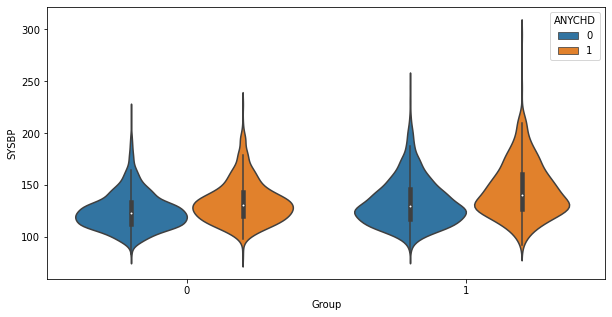

In [32]:
plt.figure(figsize = (10, 5))
sns.violinplot(x="Group", y="SYSBP", data=frmgP1TrimmedCHD, hue = 'ANYCHD')

<AxesSubplot:xlabel='Group', ylabel='SYSBP'>

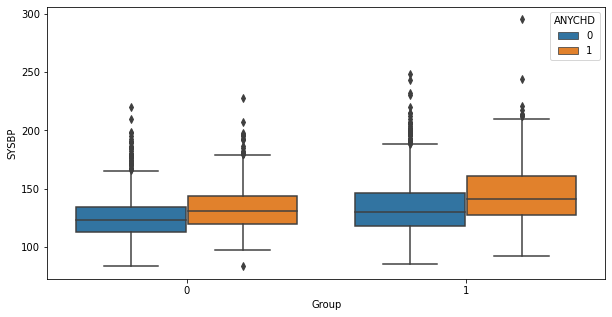

In [33]:
plt.figure(figsize = (10, 5))
sns.boxplot(x="Group", y="SYSBP", data=frmgP1TrimmedCHD, hue = "ANYCHD")

***There seems to be no difference between the groups in terms of systolic blood pressure, however people with any coronary heart disease seem to have higher systolic blood pressure regardless of the group they were assigned to by the algorithm.***

### Period 1 (CHD): Investigating Age

<AxesSubplot:xlabel='Group', ylabel='AGE'>

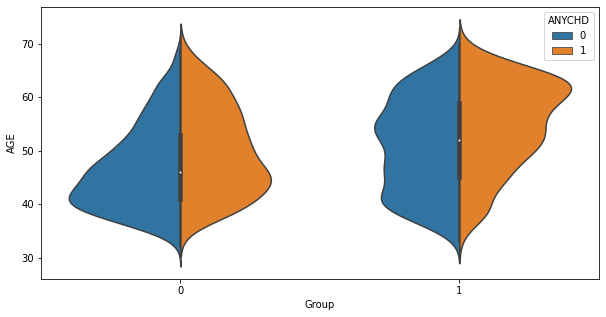

In [34]:
plt.figure(figsize = (10, 5))
sns.violinplot(x="Group", y="AGE", data=frmgP1TrimmedCHD, hue = "ANYCHD", split = True)

<AxesSubplot:xlabel='Group', ylabel='AGE'>

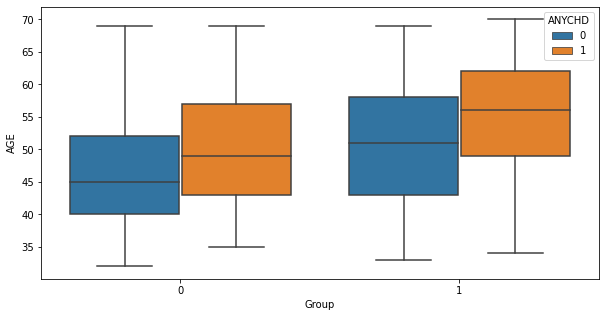

In [35]:
plt.figure(figsize = (10, 5))
sns.boxplot(x="Group", y="AGE", data=frmgP1TrimmedCHD, hue = "ANYCHD")

***People with with CHD tend to be older than people without CHD in both groups.***

### Period 1 (CHD): Investigating Cigarettes per Day

<AxesSubplot:xlabel='Group', ylabel='CIGPDAY'>

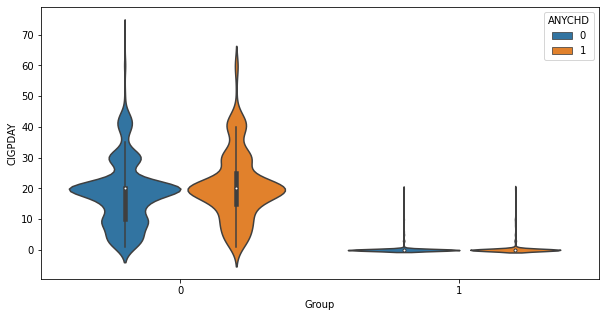

In [36]:
plt.figure(figsize = (10, 5))
sns.violinplot(x="Group", y="CIGPDAY", data=frmgP1TrimmedCHD, hue = 'ANYCHD')

<AxesSubplot:xlabel='Group', ylabel='CIGPDAY'>

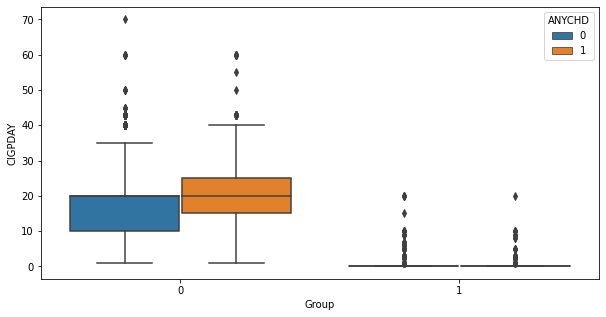

In [37]:
plt.figure(figsize = (10, 5))
sns.boxplot(x="Group", y="CIGPDAY", data=frmgP1TrimmedCHD, hue = "ANYCHD")

***Most people who smoke 10 or more cigarettes per day were included in group 0. However, there isn't a significant difference in incidence of CHD between the two groups.***

## Perform k-Means Clustering for Period 2

### Scale Data

In [38]:
scaler = StandardScaler()
scaler.fit(frmgP2TrimmedCHD.drop('ANYCHD',axis=1))
scaledVariables = scaler.transform(frmgP2TrimmedCHD.drop('ANYCHD',axis=1))
frmgP2ScaledCHD = pd.DataFrame(scaledVariables, columns=frmgP2TrimmedCHD.columns[:-1]) # leaves out predictor variable
frmgP2ScaledCHD.head()

,AGE,SYSBP,DIABP,CURSMOKE,CIGPDAY,TOTCHOL,BMI,GLUCOSE,HEARTRTE
0,-0.389058,-1.408993,-1.269856,-0.883170,-0.682564,0.228697,0.879282,0.181846,0.220747
1,-0.155305,0.191885,0.439895,1.132285,1.637841,0.734979,-0.126882,0.227184,-0.179019
2,1.364088,2.059577,2.193485,1.132285,0.864372,-0.387646,1.063787,0.317860,-1.378318
3,-0.505935,-1.231118,-0.612260,1.132285,1.637841,2.055713,-0.584454,-0.452888,1.020280
4,-0.739688,1.792764,1.579729,-0.883170,-0.682564,-0.431670,1.354074,0.181846,3.418878


## Period 2 (CHD): Selecting the number of clusters with silhouette analysis on KMeans clustering
Source: [scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis](https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html#selecting-the-number-of-clusters-with-silhouette-analysis-on-kmeans-clustering)
### Additional Packages

In [39]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

In [40]:
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]

In [41]:
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(frmgP2ScaledCHD)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed clusters
    silhouette_avg = silhouette_score(frmgP2ScaledCHD, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

For n_clusters = 2 The average silhouette_score is : 0.2071788058154991
For n_clusters = 3 The average silhouette_score is : 0.17773342033863285
For n_clusters = 4 The average silhouette_score is : 0.15785191904485205
For n_clusters = 5 The average silhouette_score is : 0.14920917195386596
For n_clusters = 6 The average silhouette_score is : 0.14511156460751998
For n_clusters = 7 The average silhouette_score is : 0.1425302755153621
For n_clusters = 8 The average silhouette_score is : 0.14225067989866202
For n_clusters = 9 The average silhouette_score is : 0.13934075032038962
For n_clusters = 10 The average silhouette_score is : 0.14050849854984382


__*Using the silhouette score to check the optimal number of clusters shows that the optimal number of clusters is 2. <br> [Source: Silhouette Coefficient, Towards Data Science](https://towardsdatascience.com/silhouette-coefficient-validating-clustering-techniques-e976bb81d10c)*__

### Period 2 (CHD): Testing 2 clusters

In [42]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(frmgP2ScaledCHD)

KMeans(n_clusters=2)

In [43]:
frmgP2TrimmedCHD['Group'] = kmeans.labels_
frmgP2TrimmedCHD.head()

,AGE,SYSBP,DIABP,CURSMOKE,CIGPDAY,TOTCHOL,BMI,GLUCOSE,HEARTRTE,ANYCHD,Group
0,52,105.0,69.5,0,0,260,29.43,86,80,0,1
1,54,141.0,89.0,1,30,283,25.34,87,75,0,0
2,67,183.0,109.0,1,20,232,30.18,89,60,0,0
3,51,109.0,77.0,1,30,343,23.48,72,90,0,0
4,49,177.0,102.0,0,0,230,31.36,86,120,1,1


### Period 2 (CHD): Investigate Means by Category

In [44]:
frmgP2TrimmedCHD.groupby('Group').mean()

,AGE,SYSBP,DIABP,CURSMOKE,CIGPDAY,TOTCHOL,BMI,GLUCOSE,HEARTRTE,ANYCHD
Group,,,,,,,,,,
0,52.804826,132.444287,82.379347,1.000000,20.616749,246.879347,24.962931,80.584812,78.286018,0.268275
1,57.200526,139.829737,85.172105,0.021579,0.080000,251.635789,26.517879,83.030526,76.462632,0.273158


***The major differences between the groups are average systolic blood pressure, current smoker, number of cigarettes per day, and age. However, the incidence of CHD seems to be identical for both groups.***

### Period 2 (CHD): Investigating Age

<AxesSubplot:xlabel='Group', ylabel='AGE'>

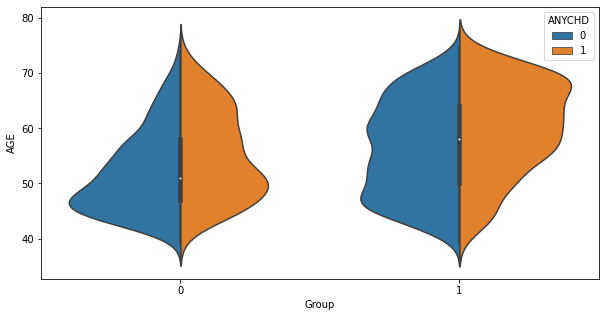

In [45]:
plt.figure(figsize = (10, 5))
sns.violinplot(x="Group", y="AGE", data=frmgP2TrimmedCHD, hue = "ANYCHD", split = True)

<AxesSubplot:xlabel='Group', ylabel='AGE'>

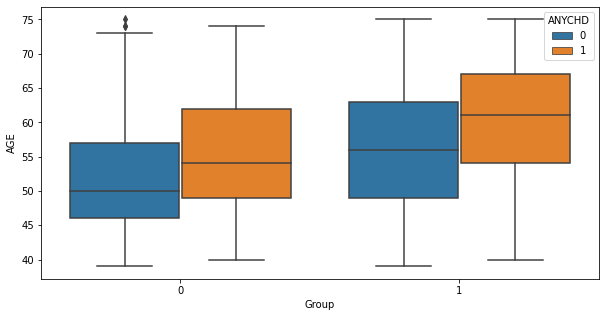

In [46]:
plt.figure(figsize = (10, 5))
sns.boxplot(x="Group", y="AGE", data=frmgP2TrimmedCHD, hue = "ANYCHD")

***The people who had any type of coronary heart disease tend to be older***

### Period 2 (CHD): Investigating Systolic Blood Pressure

<AxesSubplot:xlabel='Group', ylabel='SYSBP'>

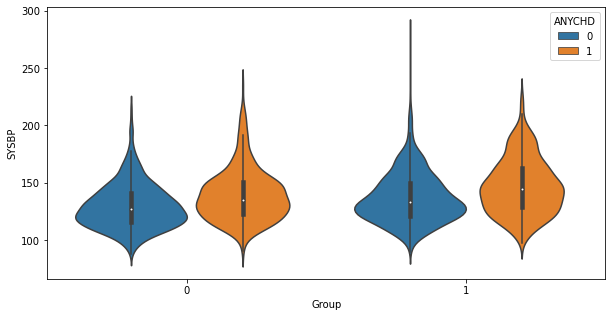

In [47]:
plt.figure(figsize = (10, 5))
sns.violinplot(x="Group", y="SYSBP", data=frmgP2TrimmedCHD, hue = 'ANYCHD')

<AxesSubplot:xlabel='Group', ylabel='SYSBP'>

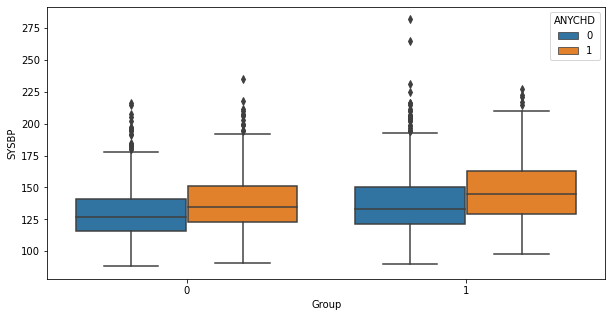

In [48]:
plt.figure(figsize = (10, 5))
sns.boxplot(x="Group", y="SYSBP", data=frmgP2TrimmedCHD, hue = "ANYCHD")

***There seems to be no difference between the groups in terms of systolic blood pressure, however people with any coronary heart disease seem to have higher systolic blood pressure regardless of the group they were assigned to by the algorithm.***

### Period 2 (CHD): Investigating Cigarettes per Day

<AxesSubplot:xlabel='Group', ylabel='CIGPDAY'>

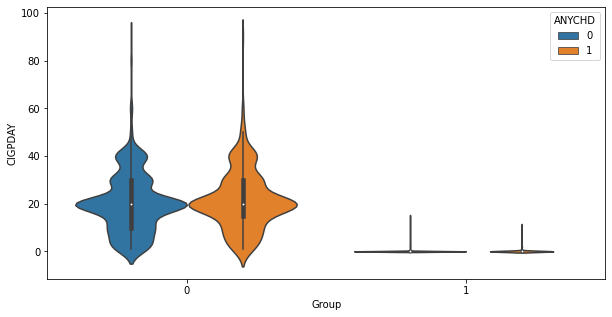

In [49]:
plt.figure(figsize = (10, 5))
sns.violinplot(x="Group", y="CIGPDAY", data=frmgP2TrimmedCHD, hue = 'ANYCHD')

<AxesSubplot:xlabel='Group', ylabel='CIGPDAY'>

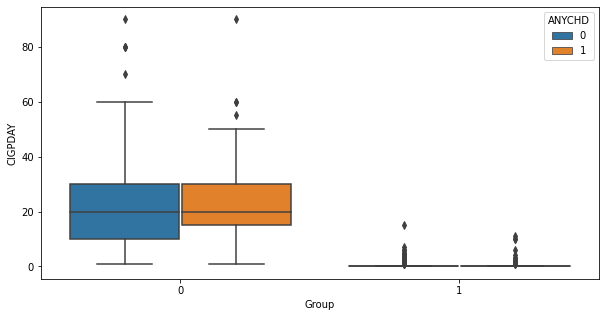

In [50]:
plt.figure(figsize = (10, 5))
sns.boxplot(x="Group", y="CIGPDAY", data=frmgP2TrimmedCHD, hue = "ANYCHD")

***People in group 0 seem to smoke more cigarettes per day than people in group 1.***

## Perform k-Means Clustering for Period 3

### Scale Data

In [51]:
scaler = StandardScaler()
scaler.fit(frmgP3TrimmedCHD.drop('ANYCHD',axis=1))
scaledVariables = scaler.transform(frmgP3TrimmedCHD.drop('ANYCHD',axis=1))
frmgP3ScaledCHD = pd.DataFrame(scaledVariables, columns=frmgP3TrimmedCHD.columns[:-1]) # leaves out predictor variable
frmgP3ScaledCHD.head()

,AGE,SYSBP,DIABP,CURSMOKE,CIGPDAY,TOTCHOL,BMI,GLUCOSE,HEARTRTE
0,-0.268097,-1.395398,-1.330160,-0.730236,-0.589921,-0.016812,0.698759,-0.620642,0.192369
1,-0.629002,1.821608,2.201516,-0.730236,-0.589921,-0.393216,1.383784,-0.277181,0.674897
2,-0.388398,-1.306037,-3.095999,1.369420,1.997623,1.820924,-0.963774,-0.071105,-0.209737
3,0.453714,1.285440,1.671765,-0.730236,-0.589921,0.935268,-0.014488,-0.242835,1.157424
4,-0.629002,1.508844,3.702479,-0.730236,-0.589921,-0.592489,0.855263,-0.139797,-0.209737


## Period 3 (CHD): Selecting the number of clusters with silhouette analysis on KMeans clustering
Source: [scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis](https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html#selecting-the-number-of-clusters-with-silhouette-analysis-on-kmeans-clustering)
### Additional Packages

In [52]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

In [53]:
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]

In [54]:
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(frmgP3ScaledCHD)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed clusters
    silhouette_avg = silhouette_score(frmgP3ScaledCHD, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

For n_clusters = 2 The average silhouette_score is : 0.2255512554806824
For n_clusters = 3 The average silhouette_score is : 0.18781698650950207
For n_clusters = 4 The average silhouette_score is : 0.18015868720900408
For n_clusters = 5 The average silhouette_score is : 0.15446928531747572
For n_clusters = 6 The average silhouette_score is : 0.1466824070775967
For n_clusters = 7 The average silhouette_score is : 0.1385383452282311
For n_clusters = 8 The average silhouette_score is : 0.1303155792122536
For n_clusters = 9 The average silhouette_score is : 0.1337404033271728
For n_clusters = 10 The average silhouette_score is : 0.12892675630354927


__*Using the silhouette score to check the optimal number of clusters shows that the optimal number of clusters is 2. <br> [Source: Silhouette Coefficient, Towards Data Science](https://towardsdatascience.com/silhouette-coefficient-validating-clustering-techniques-e976bb81d10c)*__

### Period 3 (CHD): Testing 2 clusters

In [55]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(frmgP3ScaledCHD)

KMeans(n_clusters=2)

In [56]:
frmgP3TrimmedCHD['Group'] = kmeans.labels_
frmgP3TrimmedCHD.head()

,AGE,SYSBP,DIABP,CURSMOKE,CIGPDAY,TOTCHOL,BMI,GLUCOSE,HEARTRTE,ANYCHD,Group
0,58,108.0,66.0,0,0,237,28.50,71,80,0,1
1,55,180.0,106.0,0,0,220,31.17,81,86,1,1
2,57,110.0,46.0,1,30,320,22.02,87,75,0,0
3,64,168.0,100.0,0,0,280,25.72,82,92,0,1
4,55,173.0,123.0,0,0,211,29.11,85,75,0,1


### Period 3 (CHD): Investigate Means by Category

In [57]:
frmgP3TrimmedCHD.groupby('Group').mean()

,AGE,SYSBP,DIABP,CURSMOKE,CIGPDAY,TOTCHOL,BMI,GLUCOSE,HEARTRTE,ANYCHD
Group,,,,,,,,,,
0,57.184576,134.206068,80.196587,1.000000,19.892541,233.407080,24.945942,86.639697,78.303413,0.235145
1,61.817822,141.853795,81.519142,0.007261,0.024422,240.031683,26.210099,90.339274,77.244884,0.267987


***The major differences between the groups are average age, systolic blood pressure, current smoker, cigarettes per day. The incidence of CHD varies about 3% between the two groups.***

### Period 3 (CHD): Investigating Age

<AxesSubplot:xlabel='Group', ylabel='AGE'>

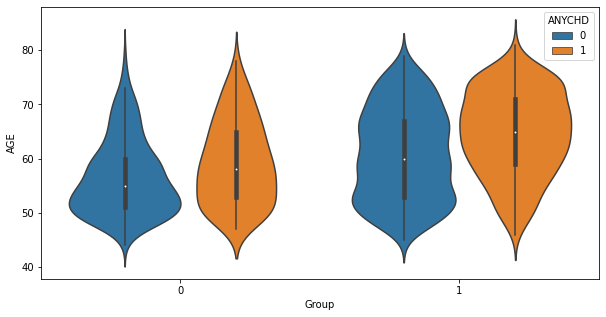

In [58]:
plt.figure(figsize = (10, 5))
sns.violinplot(x="Group", y="AGE", data=frmgP3TrimmedCHD, hue = 'ANYCHD')

<AxesSubplot:xlabel='Group', ylabel='AGE'>

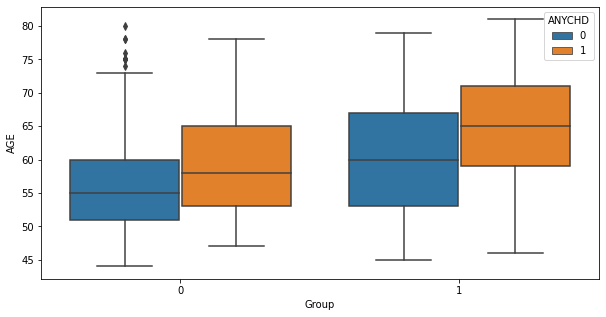

In [59]:
plt.figure(figsize = (10, 5))
sns.boxplot(x="Group", y="AGE", data=frmgP3TrimmedCHD, hue = "ANYCHD")

***The individuals with CHD seem to older regardless of the group they were assigned to.***

### Period 3 (CHD): Investigating Systolic Blood Pressure

<AxesSubplot:xlabel='Group', ylabel='SYSBP'>

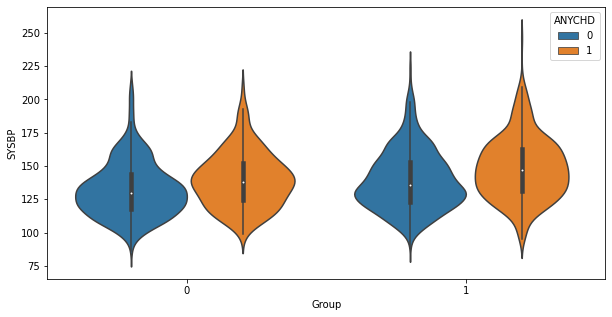

In [60]:
plt.figure(figsize = (10, 5))
sns.violinplot(x="Group", y="SYSBP", data=frmgP3TrimmedCHD, hue = 'ANYCHD')

<AxesSubplot:xlabel='Group', ylabel='SYSBP'>

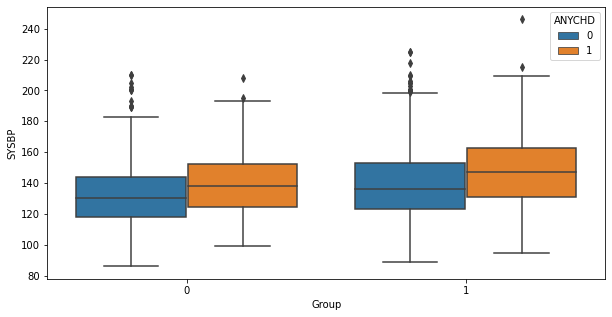

In [61]:
plt.figure(figsize = (10, 5))
sns.boxplot(x="Group", y="SYSBP", data=frmgP3TrimmedCHD, hue = "ANYCHD")

***There seems to be little difference between the systolic blood pressure between the groups, however the people with CHD seem to have a higher systolic blood pressure.***

### Period 3 (CHD): Investigating Cigarettes per Day

<AxesSubplot:xlabel='Group', ylabel='CIGPDAY'>

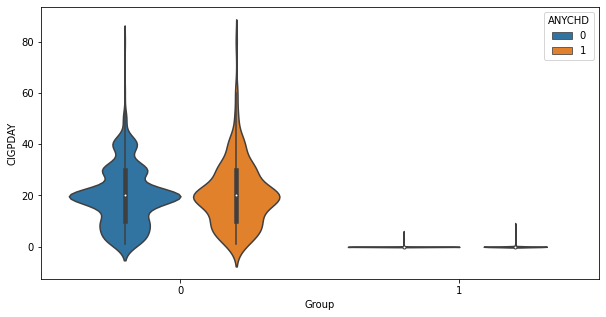

In [62]:
plt.figure(figsize = (10, 5))
sns.violinplot(x="Group", y="CIGPDAY", data=frmgP3TrimmedCHD, hue = 'ANYCHD')

<AxesSubplot:xlabel='Group', ylabel='CIGPDAY'>

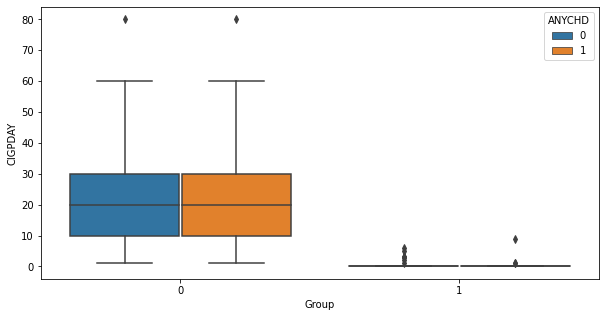

In [63]:
plt.figure(figsize = (10, 5))
sns.boxplot(x="Group", y="CIGPDAY", data=frmgP3TrimmedCHD, hue = "ANYCHD")

***Group 1 smokes on average 20 cigarettes per day, while group 0 seems to include mostly nonsmokers with some that smoke less than 10 cigarettes per day.***

# Death
---

## Perform k-Means Clustering for Period 1

### Scale Data

In [64]:
scaler = StandardScaler()
scaler.fit(frmgP1TrimmedDTH.drop('DEATH',axis=1))
scaledVariables = scaler.transform(frmgP1TrimmedDTH.drop('DEATH',axis=1))
frmgP1ScaledDTH = pd.DataFrame(scaledVariables, columns=frmgP1TrimmedDTH.columns[:-1]) # leaves out predictor variable
frmgP1ScaledDTH.head()

,AGE,SYSBP,DIABP,CURSMOKE,CIGPDAY,TOTCHOL,BMI,HEARTRTE,ANYCHD,STROKE
0,-1.259069,-1.202072,-1.087855,-0.972618,-0.751371,-0.944321,0.273900,0.353756,1.602110,-0.322522
1,-0.452653,-0.532954,-0.176555,-0.972618,-0.751371,0.286232,0.705156,1.598560,-0.624177,-0.322522
2,-0.222249,-0.243003,-0.259401,1.028153,0.923032,0.174363,-0.125502,-0.061178,-0.624177,-0.322522
3,1.275379,0.760673,0.983280,1.028153,1.760234,-0.273111,0.668401,-0.891048,-0.624177,3.100567
4,-0.452653,-0.131483,0.071981,1.028153,1.174193,1.069311,-0.674374,0.768691,-0.624177,-0.322522


## Period 1 (DEATH): Selecting the number of clusters with silhouette analysis on KMeans clustering
Source: [scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis](https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html#selecting-the-number-of-clusters-with-silhouette-analysis-on-kmeans-clustering)
### Additional Packages

In [65]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

In [66]:
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]

In [67]:
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(frmgP1ScaledDTH)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed clusters
    silhouette_avg = silhouette_score(frmgP1ScaledDTH, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

For n_clusters = 2 The average silhouette_score is : 0.16772542445577313
For n_clusters = 3 The average silhouette_score is : 0.1693208742378608
For n_clusters = 4 The average silhouette_score is : 0.18038885246897854
For n_clusters = 5 The average silhouette_score is : 0.16234699284927337
For n_clusters = 6 The average silhouette_score is : 0.18377773515683418
For n_clusters = 7 The average silhouette_score is : 0.1474481025878206
For n_clusters = 8 The average silhouette_score is : 0.15019127553054606
For n_clusters = 9 The average silhouette_score is : 0.14611460335422313
For n_clusters = 10 The average silhouette_score is : 0.15153331170532458


__*Using the silhouette score to check the optimal number of clusters shows that the optimal number of clusters is 4. <br> [Source: Silhouette Coefficient, Towards Data Science](https://towardsdatascience.com/silhouette-coefficient-validating-clustering-techniques-e976bb81d10c)*__

### Period 1 (DEATH): Testing 4 clusters

In [68]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(frmgP1ScaledDTH)

KMeans(n_clusters=4)

In [69]:
frmgP1TrimmedDTH['Group'] = kmeans.labels_
frmgP1TrimmedDTH.head()

,AGE,SYSBP,DIABP,CURSMOKE,CIGPDAY,TOTCHOL,BMI,HEARTRTE,ANYCHD,STROKE,DEATH,Group
0,39,106.0,70.0,0,0,195,26.97,80,1,0,0,1
1,46,121.0,81.0,0,0,250,28.73,95,0,0,0,1
2,48,127.5,80.0,1,20,245,25.34,75,0,0,0,3
3,61,150.0,95.0,1,30,225,28.58,65,0,1,1,2
4,46,130.0,84.0,1,23,285,23.10,85,0,0,0,3


### Period 1 (DEATH): Investigating Means by Category

In [70]:
frmgP1TrimmedDTH.groupby('Group').mean()

,AGE,SYSBP,DIABP,CURSMOKE,CIGPDAY,TOTCHOL,BMI,HEARTRTE,ANYCHD,STROKE,DEATH
Group,,,,,,,,,,,
0,55.611995,159.323133,95.809058,0.293758,4.119951,259.097919,28.496353,80.088127,0.490820,0.002448,0.538556
1,48.819567,123.490778,78.714114,0.000000,0.000000,230.354451,25.373601,73.254210,0.159583,0.000000,0.221331
2,55.446866,145.727520,88.761580,0.471390,8.613079,241.705722,26.889564,74.792916,0.416894,1.000000,0.645777
3,46.397059,123.290775,78.508021,1.000000,19.195856,229.859626,24.552587,75.662433,0.232620,0.000668,0.282086


***The major differences between the groups are average age, systolic blood pressure, prevalence of any CHD, and prevalence of stroke. The incidence of death is significantly higher in 2 of the groups, and highest in the group with incidence of stroke.***

### Period 1 (DEATH): Investigating Age

<AxesSubplot:xlabel='Group', ylabel='AGE'>

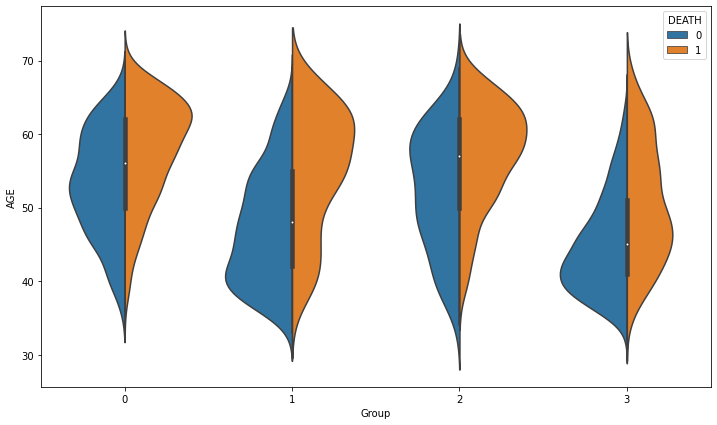

In [71]:
plt.figure(figsize = (12, 7))
sns.violinplot(x="Group", y="AGE", data=frmgP1TrimmedDTH, hue = "DEATH", split = True)

<AxesSubplot:xlabel='Group', ylabel='AGE'>

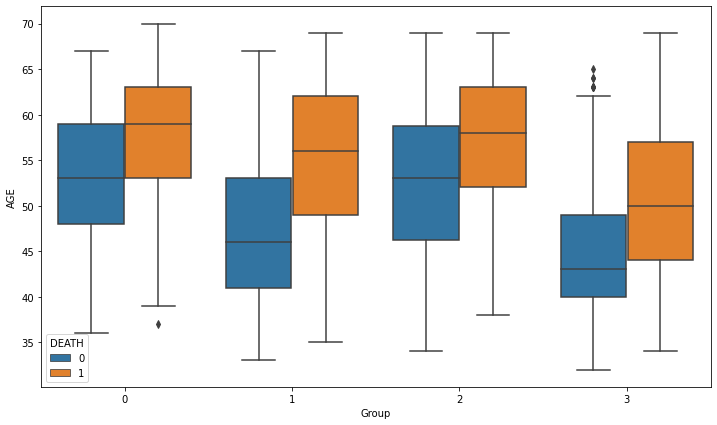

In [72]:
plt.figure(figsize = (12, 7))
sns.boxplot(x="Group", y="AGE", data=frmgP1TrimmedDTH, hue = "DEATH")

***Incidence of death occurred in older people regardless of the group they were assigned to. In groups 0, 1, 2 most people who died were older on average.***

### Period 1 (DEATH): Investigating Systolic Blood Pressure

<AxesSubplot:xlabel='Group', ylabel='SYSBP'>

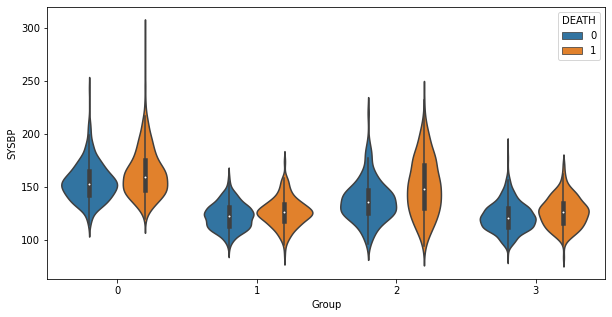

In [73]:
plt.figure(figsize = (10, 5))
sns.violinplot(x="Group", y="SYSBP", data=frmgP1TrimmedDTH, hue = 'DEATH')

<AxesSubplot:xlabel='Group', ylabel='SYSBP'>

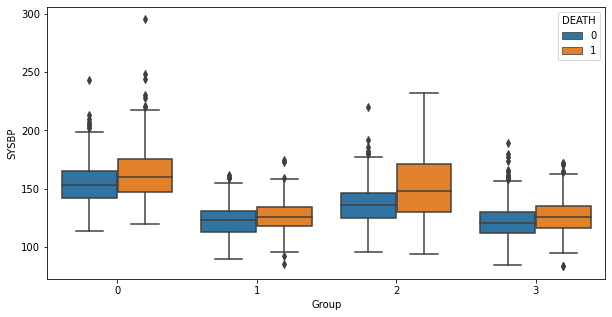

In [74]:
plt.figure(figsize = (10, 5))
sns.boxplot(x="Group", y="SYSBP", data=frmgP1TrimmedDTH, hue = "DEATH")

***Groups 0 and 2 seem to have a higher systolic blood pressure, but there only a noticeable difference in systolic blood pressure between those who died and those who didn't die in group 2. Group 0 includes most of the highest values.***

### Period 1 (DEATH): Investigating Prevalence of CHD

<AxesSubplot:xlabel='Group', ylabel='ANYCHD'>

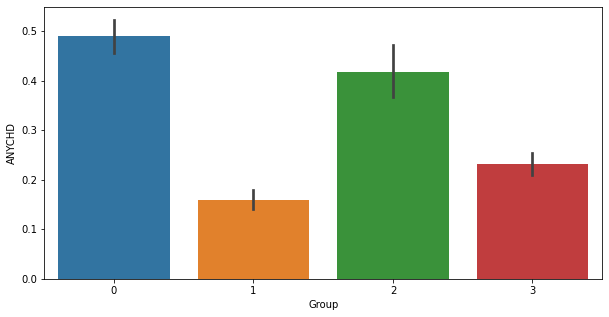

In [75]:
plt.figure(figsize = (10, 5))
sns.barplot(x="Group", y="ANYCHD", data=frmgP1TrimmedDTH)

<AxesSubplot:xlabel='Group', ylabel='ANYCHD'>

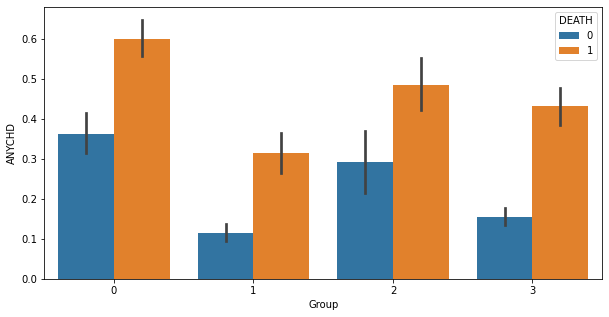

In [76]:
plt.figure(figsize = (10, 5))
sns.barplot(x="Group", y="ANYCHD", data=frmgP1TrimmedDTH, hue='DEATH')

***Incidence of CHD is higher in groups 0 and 2, but it seems to be spread out in all four groups, indicating that incidence of CHD wasn't characteristic of a single group. In all groups there were more individuals who died than those who didn't***
### Period 1 (DEATH): Investigating Prevalence of Stroke

<AxesSubplot:xlabel='Group', ylabel='STROKE'>

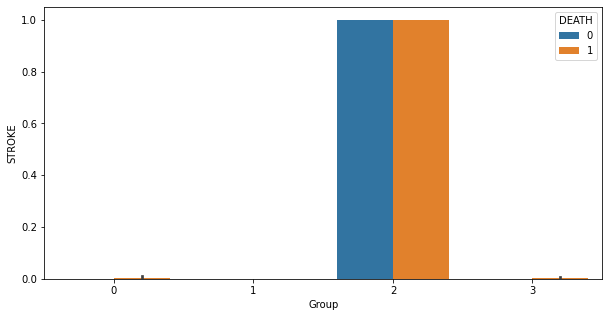

In [77]:
plt.figure(figsize = (10, 5))
sns.barplot(x="Group", y="STROKE", data=frmgP1TrimmedDTH, hue = "DEATH")

***Most of the individuals who had a stroke are in Group 2, and of those are equally split between those who died and those who didn't.***

## Perform k-Means Clustering for Period 2

### Scale Data

In [79]:
scaler = StandardScaler()
scaler.fit(frmgP2TrimmedDTH.drop('DEATH',axis=1))
scaledVariables = scaler.transform(frmgP2TrimmedDTH.drop('DEATH',axis=1))
frmgP2ScaledDTH = pd.DataFrame(scaledVariables, columns=frmgP2TrimmedDTH.columns[:-1]) # leaves out predictor variable
frmgP2ScaledDTH.head()

,AGE,SYSBP,DIABP,CURSMOKE,CIGPDAY,TOTCHOL,BMI,HEARTRTE,ANYCHD,STROKE
0,-0.389058,-1.408993,-1.269856,-0.883170,-0.682564,0.228697,0.879282,0.220747,-0.609828,-0.323222
1,-0.155305,0.191885,0.439895,1.132285,1.637841,0.734979,-0.126882,-0.179019,-0.609828,-0.323222
2,1.364088,2.059577,2.193485,1.132285,0.864372,-0.387646,1.063787,-1.378318,-0.609828,3.093846
3,-0.505935,-1.231118,-0.612260,1.132285,1.637841,2.055713,-0.584454,1.020280,-0.609828,-0.323222
4,-0.739688,1.792764,1.579729,-0.883170,-0.682564,-0.431670,1.354074,3.418878,1.639806,-0.323222


## Period 2 (DEATH): Selecting the number of clusters with silhouette analysis on KMeans clustering
Source: [scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis](https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html#selecting-the-number-of-clusters-with-silhouette-analysis-on-kmeans-clustering)
### Additional Packages

In [80]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

In [81]:
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]

In [82]:
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(frmgP2ScaledDTH)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed clusters
    silhouette_avg = silhouette_score(frmgP2ScaledDTH, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

For n_clusters = 2 The average silhouette_score is : 0.18410305416098227
For n_clusters = 3 The average silhouette_score is : 0.1636356648575765
For n_clusters = 4 The average silhouette_score is : 0.17259485589872406
For n_clusters = 5 The average silhouette_score is : 0.1547065176213424
For n_clusters = 6 The average silhouette_score is : 0.15728861001088576
For n_clusters = 7 The average silhouette_score is : 0.14591546706064723
For n_clusters = 8 The average silhouette_score is : 0.15136933410355993
For n_clusters = 9 The average silhouette_score is : 0.14368513438601224
For n_clusters = 10 The average silhouette_score is : 0.14610410732408036


__*Using the silhouette score to check the optimal number of clusters shows that the optimal number of clusters is 2. <br> [Source: Silhouette Coefficient, Towards Data Science](https://towardsdatascience.com/silhouette-coefficient-validating-clustering-techniques-e976bb81d10c)*__

### Period 2 (DEATH): Testing 2 clusters

In [83]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(frmgP2ScaledDTH)

KMeans(n_clusters=2)

In [84]:
frmgP2TrimmedDTH['Group'] = kmeans.labels_
frmgP2TrimmedDTH.head()

,AGE,SYSBP,DIABP,CURSMOKE,CIGPDAY,TOTCHOL,BMI,HEARTRTE,ANYCHD,STROKE,DEATH,Group
0,52,105.0,69.5,0,0,260,29.43,80,0,0,0,0
1,54,141.0,89.0,1,30,283,25.34,75,0,0,0,1
2,67,183.0,109.0,1,20,232,30.18,60,0,1,1,1
3,51,109.0,77.0,1,30,343,23.48,90,0,0,0,1
4,49,177.0,102.0,0,0,230,31.36,120,1,0,0,0


### Period 2 (DEATH): Investigate Means by Category

In [85]:
frmgP2TrimmedDTH.groupby('Group').mean()

,AGE,SYSBP,DIABP,CURSMOKE,CIGPDAY,TOTCHOL,BMI,HEARTRTE,ANYCHD,STROKE,DEATH
Group,,,,,,,,,,,
0,57.267120,140.059592,85.191323,0.028228,0.124412,251.756926,26.505295,76.419760,0.276006,0.104025,0.307893
1,52.672636,132.060530,82.327006,1.000000,20.747135,246.669054,24.965695,78.361748,0.264327,0.081662,0.289398


***The major differences between the groups are average age, systolic blood pressure, current smoker, andnumber of cigarettes per day. There isn't a significant difference in incidence of death between the two groups.***

### Period 2 (DEATH): Investigating Age

<AxesSubplot:xlabel='Group', ylabel='AGE'>

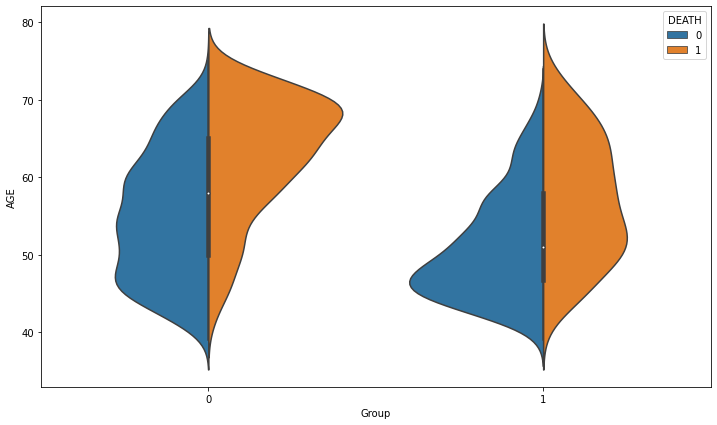

In [86]:
plt.figure(figsize = (12, 7))
sns.violinplot(x="Group", y="AGE", data=frmgP2TrimmedDTH, hue = "DEATH", split = True)

<AxesSubplot:xlabel='Group', ylabel='AGE'>

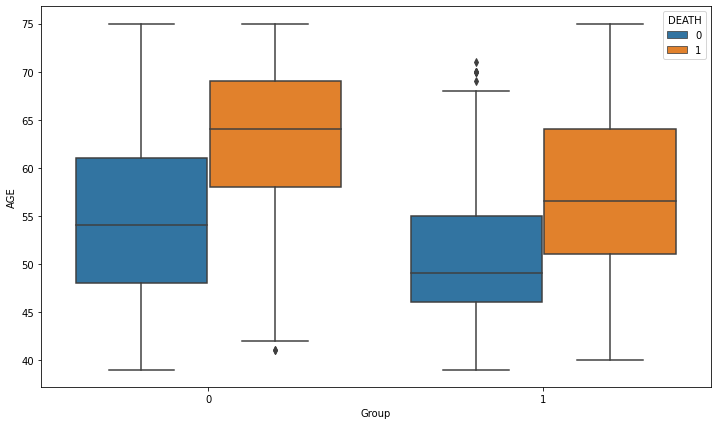

In [87]:
plt.figure(figsize = (12, 7))
sns.boxplot(x="Group", y="AGE", data=frmgP2TrimmedDTH, hue = "DEATH")

***Incidence of death occurred in older people regardless of the group they were assigned to. In the nonsmoker group (0) death occurred at an older age than in the smoker group.***

### Period 2 (DEATH): Investigating Systolic Blood Pressure

<AxesSubplot:xlabel='Group', ylabel='SYSBP'>

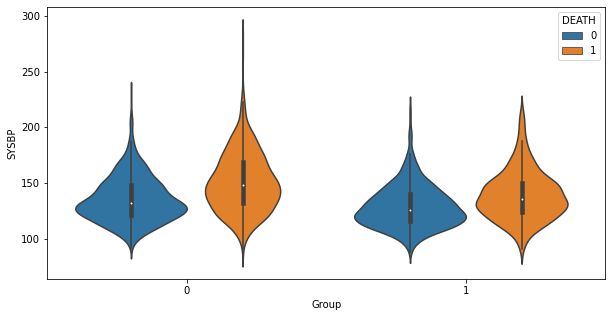

In [88]:
plt.figure(figsize = (10, 5))
sns.violinplot(x="Group", y="SYSBP", data=frmgP2TrimmedDTH, hue = 'DEATH')

<AxesSubplot:xlabel='Group', ylabel='SYSBP'>

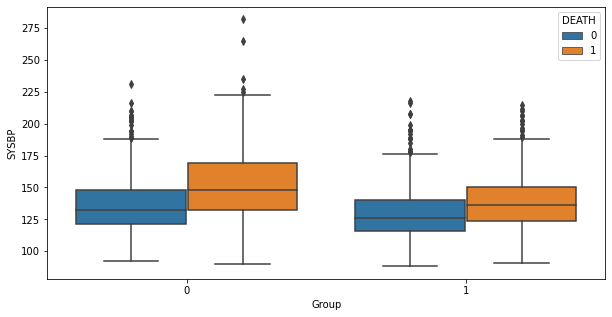

In [89]:
plt.figure(figsize = (10, 5))
sns.boxplot(x="Group", y="SYSBP", data=frmgP2TrimmedDTH, hue = "DEATH")

***Group 0 includes most of the extreme values. People who died tended to have a slightly higher systolic blood pressure, when compared to those who didn't die.***

### Period 2 (DEATH): Investigating Smoking Status

<AxesSubplot:xlabel='Group', ylabel='CURSMOKE'>

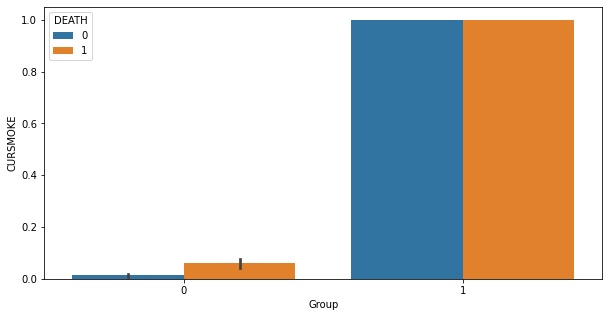

In [90]:
plt.figure(figsize = (10, 5))
sns.barplot(x="Group", y="CURSMOKE", data=frmgP2TrimmedDTH, hue = 'DEATH')

***Most smokers were included in group 1. In that group, people who died and people who didn't die are split evenly.***
### Period 2 (DEATH): Investigating Cigarettes per Day

<AxesSubplot:xlabel='Group', ylabel='CIGPDAY'>

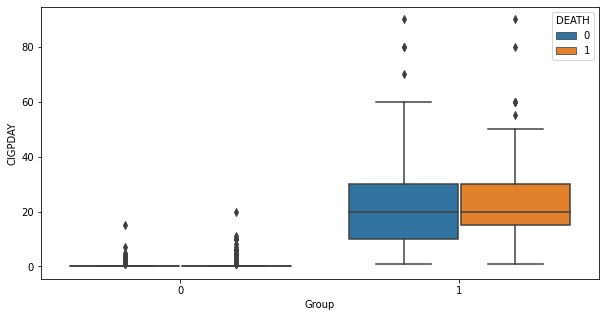

In [91]:
plt.figure(figsize = (10, 5))
sns.boxplot(x="Group", y="CIGPDAY", data=frmgP2TrimmedDTH, hue = "DEATH")

***Most of the individuals who smoke more than 10 cigarretes per day were included in group 2, which included the extreme values for both people who died and people who didn't.***

## Perform k-Means Clustering for Period 3

### Scale Data

In [92]:
scaler = StandardScaler()
scaler.fit(frmgP3TrimmedDTH.drop('DEATH',axis=1))
scaledVariables = scaler.transform(frmgP3TrimmedDTH.drop('DEATH',axis=1))
frmgP3ScaledDTH = pd.DataFrame(scaledVariables, columns=frmgP3TrimmedDTH.columns[:-1]) # leaves out predictor variable
frmgP3ScaledDTH.head()

,AGE,SYSBP,DIABP,CURSMOKE,CIGPDAY,TOTCHOL,BMI,HEARTRTE,ANYCHD,STROKE
0,-0.268097,-1.395398,-1.330160,-0.730236,-0.589921,-0.016812,0.698759,0.192369,-0.587700,-0.301369
1,-0.629002,1.821608,2.201516,-0.730236,-0.589921,-0.393216,1.383784,0.674897,1.701549,-0.301369
2,-0.388398,-1.306037,-3.095999,1.369420,1.997623,1.820924,-0.963774,-0.209737,-0.587700,-0.301369
3,0.453714,1.285440,1.671765,-0.730236,-0.589921,0.935268,-0.014488,1.157424,-0.587700,-0.301369
4,-0.629002,1.508844,3.702479,-0.730236,-0.589921,-0.592489,0.855263,-0.209737,-0.587700,-0.301369


## Period 3 (DEATH): Selecting the number of clusters with silhouette analysis on KMeans clustering
Source: [scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis](https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html#selecting-the-number-of-clusters-with-silhouette-analysis-on-kmeans-clustering)
### Additional Packages

In [93]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

In [94]:
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]

In [95]:
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(frmgP3ScaledDTH)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed clusters
    silhouette_avg = silhouette_score(frmgP3ScaledDTH, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

For n_clusters = 2 The average silhouette_score is : 0.20172124492514595
For n_clusters = 3 The average silhouette_score is : 0.22090059898270717
For n_clusters = 4 The average silhouette_score is : 0.17735734699002634
For n_clusters = 5 The average silhouette_score is : 0.18363381314932445
For n_clusters = 6 The average silhouette_score is : 0.14835273492698436
For n_clusters = 7 The average silhouette_score is : 0.14476000830229965
For n_clusters = 8 The average silhouette_score is : 0.15192463558730665
For n_clusters = 9 The average silhouette_score is : 0.1438464335785367
For n_clusters = 10 The average silhouette_score is : 0.14196901421779246


__*Using the silhouette score to check the optimal number of clusters shows that the optimal number of clusters is 3. <br> [Source: Silhouette Coefficient, Towards Data Science](https://towardsdatascience.com/silhouette-coefficient-validating-clustering-techniques-e976bb81d10c)*__

### Period 3 (DEATH): Testing 3 clusters

In [96]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(frmgP3ScaledDTH)

KMeans(n_clusters=3)

In [97]:
frmgP3TrimmedDTH['Group'] = kmeans.labels_
frmgP3TrimmedDTH.head()

,AGE,SYSBP,DIABP,CURSMOKE,CIGPDAY,TOTCHOL,BMI,HEARTRTE,ANYCHD,STROKE,DEATH,Group
0,58,108.0,66.0,0,0,237,28.50,80,0,0,0,2
1,55,180.0,106.0,0,0,220,31.17,86,1,0,0,2
2,57,110.0,46.0,1,30,320,22.02,75,0,0,0,1
3,64,168.0,100.0,0,0,280,25.72,92,0,0,0,2
4,55,173.0,123.0,0,0,211,29.11,75,0,0,0,2


### Period 3 (DEATH): Investigating Category by Looking at the Means

In [98]:
frmgP3TrimmedDTH.groupby('Group').mean()

,AGE,SYSBP,DIABP,CURSMOKE,CIGPDAY,TOTCHOL,BMI,HEARTRTE,ANYCHD,STROKE,DEATH
Group,,,,,,,,,,,
0,66.465969,152.945026,83.879581,0.335079,5.753927,237.078534,25.948429,78.691099,0.408377,1.000000,0.518325
1,56.630495,133.214973,79.811126,1.000000,20.112637,234.332418,24.954025,78.270604,0.219780,0.001374,0.195055
2,61.258111,140.499279,81.336337,0.007210,0.022350,239.651766,26.184470,77.111031,0.255227,0.000000,0.186734


***The major differences between the groups are average age, systolic blood pressure, current smoker, number of cigarettes per day, incidence of CHD and stroke. There is a significant difference in incidence of death between the three groups, with group 0 having a 51.8% incidence of death, with the highest average systolic blood pressure, smoked 6 cigarettes per day, and had 100% incidence of stroke. ***

### Period 3 (DEATH): Investigating Age

<AxesSubplot:xlabel='Group', ylabel='AGE'>

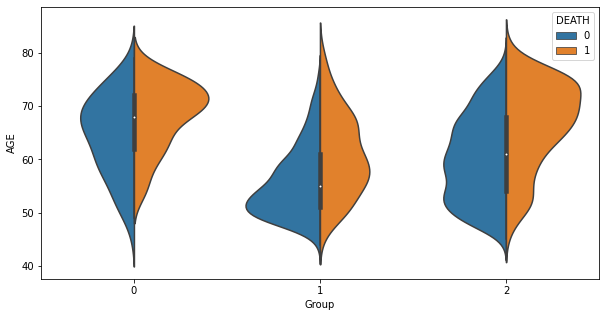

In [99]:
plt.figure(figsize = (10, 5))
sns.violinplot(x="Group", y="AGE", data=frmgP3TrimmedDTH, hue = "DEATH", split = True)

<AxesSubplot:xlabel='Group', ylabel='AGE'>

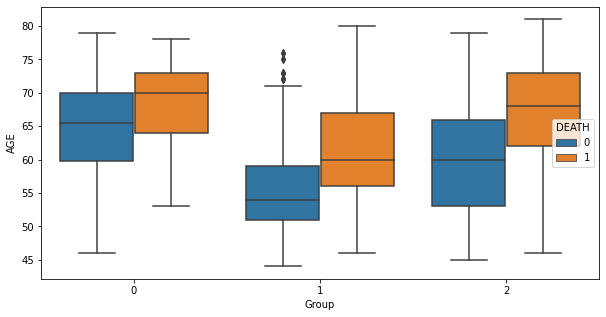

In [100]:
plt.figure(figsize = (10, 5))
sns.boxplot(x="Group", y="AGE", data=frmgP3TrimmedDTH, hue = "DEATH")

***Incidence of death occurred in older people regardless of the group they were assigned to.***

### Period 3 (DEATH): Investigating Systolic Blood Pressure

<AxesSubplot:xlabel='Group', ylabel='SYSBP'>

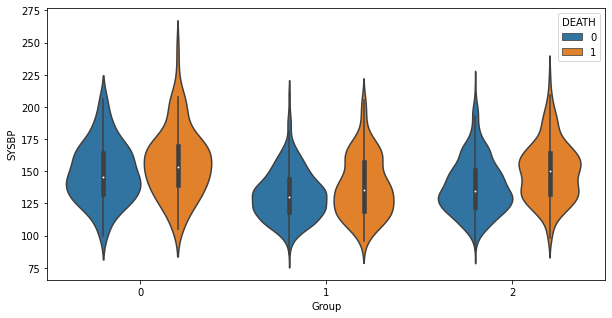

In [101]:
plt.figure(figsize = (10, 5))
sns.violinplot(x="Group", y="SYSBP", data=frmgP3TrimmedDTH, hue = 'DEATH')

<AxesSubplot:xlabel='Group', ylabel='SYSBP'>

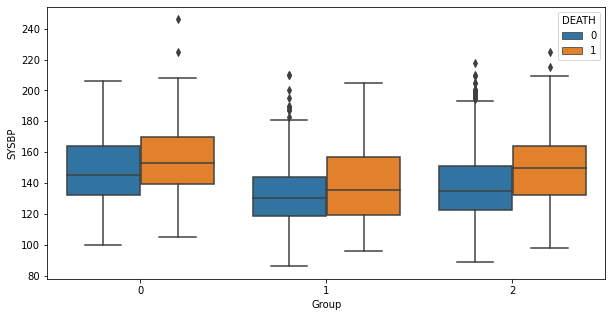

In [102]:
plt.figure(figsize = (10, 5))
sns.boxplot(x="Group", y="SYSBP", data=frmgP3TrimmedDTH, hue = "DEATH")

***Group 0 has more than 75% of people with stage 1 hypertention or worse.***

### Period 3 (DEATH): Investigating Smoking Status

<AxesSubplot:xlabel='Group', ylabel='CURSMOKE'>

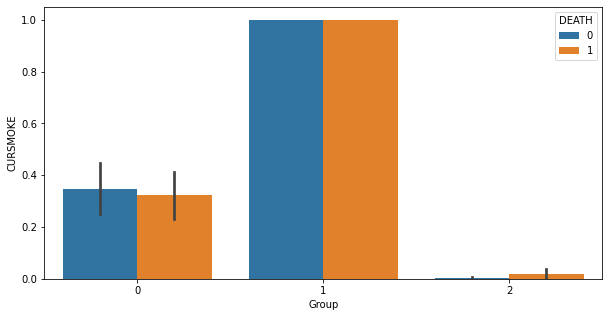

In [103]:
plt.figure(figsize = (10, 5))
sns.barplot(x="Group", y="CURSMOKE", data=frmgP3TrimmedDTH, hue = 'DEATH')

***Most smokers were included in group 1. In that group, people who died and people who didn't are split evenly and the incidence of death was 19.5%.***
### Period 3 (DEATH): Investigating Cigarettes per Day

<AxesSubplot:xlabel='Group', ylabel='CIGPDAY'>

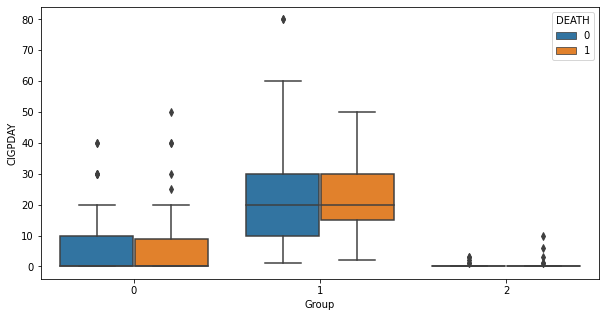

In [105]:
plt.figure(figsize = (10, 5))
sns.boxplot(x="Group", y="CIGPDAY", data=frmgP3TrimmedDTH, hue = "DEATH")

***Most of the nonsmokers were included in group 2. This is also the group that has the highest incidence of death (18.7%).***

## Conclusions
A few themes emerge from applying the k-Means algorithm to the different periods
* Age is an influencial factor in both the incidence of coronary heart disease and death
* Incidence of stroke is likely a contributor to premature death
* Smoking is a differentiator in terms of grouping, and likely a contributor to premature death